# 심부전 데이터셋
- 심혈관 질환은 전 세계적으로 사망 원인 1위다.
- 매년 약 1,790만명이 심혈관 질환으로 사망하는데, 이는 전 세계 사망자의 31%에 해당된다.
- 사망 5명 중 4명은 심장마비와 뇌졸증으로 인해 발색하고 3분의 1은 70세 미만의 나이로 조기 사망한다.




# 데이터셋 변수
- Age: 환자의 나이
- Sex: 환자의 성별
- ChestPainType: 흉통 유형
 - TA[Typical Angina]: 전형적인 혐심증(가슴 통증)
 - ATA[Atypical Angina]: 비전형적인 혐심증(TA의 통증과는 다른 통증이며, 불쾌감, 어깨 통증, 호흡곤란 등 다양한 형태의 통증)
 - NAP[Non-Anginal Pain]: 비협심증 흉통(심장과 관련된 원인이 아닌 다른 요인에 의해 발생하는 가슴통증)
 - ASY[Asymptomatic]: 무증상
- RestingBP: [resting blood pressure]: 안정된 상태에서 측정된 혈압
- Cholesterol: [serum cholesterol]: 혈액 내의 콜레스테롤 농도
- FastingBS: [fasting blood sugar]: 공복 상태에서 측정된 혈당
 - 1: 만약 공복 혈당이 120mg/dl 보다 높음
 - 0: 그 외 수치
- RestingECG: [resting electrocardiogram result]: 안정된 상태에서 측정된 심전도
 - Normal: 정상적인 상태
 - ST:ST-T에 이상을 가지고 있는 상태(심전도 검사에서 관찰되는 ST 세그먼트와 T파에 이상이 생기면 심장 혈류에 영향으로 심장 문제 발현)
 - LVH: 심장의 좌심실이 비정상적으로 커진 상태
- MaxHR: [maximum heart rate achieved]: 최대 심박수(60 ~ 220 사이)
- ExerciseAngina: 운동 시 협심증을 경험 했는지 여부
 - Y: 예
 - N: 아니요
- HeartDisease: 심장병 여부
 - 1: 심장병
 - 0: 정상

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

heart = pd.read_csv('heart.csv')
heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'HeartDisease'],
      dtype='object')

In [2]:
heart.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,HeartDisease
0,40,M,ATA,140.0,289,NaN,Normal,172,N,0.0
1,49,F,NAP,160.0,180,NaN,Normal,156,N,NaN
2,37,M,ATA,NaN,283,NaN,ST,98,N,NaN


In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       891 non-null    float64
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       827 non-null    float64
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   HeartDisease    916 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 71.8+ KB


In [4]:
heart['HeartDisease'].head()

0    0.0
1    NaN
2    NaN
3    1.0
4    0.0
Name: HeartDisease, dtype: float64

In [6]:
## 심장병 여무 파악. 있으면 True 없으면 False 
# # True, False 로 구성된 필터링 데이터를 심부전 데이터셋에 적용하여 심장병이 있는 사람만 추출 

H = heart[heart['HeartDisease'] == 1]
H.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,HeartDisease
3,48,F,ASY,NaN,214,NaN,Normal,108,Y,1.0
8,37,M,ASY,NaN,207,NaN,Normal,130,Y,1.0
11,58,M,ATA,136.0,164,NaN,ST,99,Y,1.0
13,49,M,ASY,140.0,234,NaN,Normal,140,Y,1.0
16,38,M,ASY,110.0,196,NaN,Normal,166,N,1.0


In [5]:
# 결측치 계산 
for i in heart.columns:
    missingValueRate = heart[i].isna().sum() / len(heart) * 100
    if missingValueRate > 0:
        print(f'{i} 결측치 비율: {round(missingValueRate,2)}%')
        
        # 5퍼 미만 = 이부분만 결측치 존재 하므로 행을 적절한 값으로 대체하는게 적절 
        # 5~ 20 미만 결측치가 꽤 많으므로 대체 하는 방법이 적절

RestingBP 결측치 비율: 2.94%
FastingBS 결측치 비율: 9.91%
HeartDisease 결측치 비율: 0.22%


In [7]:
# FastingBS 컬럼 결측치를 0 으로 대체 

heart['FastingBS'] = heart['FastingBS'].fillna(0)

In [8]:
#RestingBP 결측치를 중앙값으로 대체 

heart['RestingBP'] = heart['RestingBP'].replace(np.nan, heart['RestingBP'].median())

In [9]:
# 나머지 결측치가 있는건 제거 
heart.dropna(axis=0, inplace=True) # 제거된 데이터 원본 프레임 수정 

In [10]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 916 entries, 0 to 917
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             916 non-null    int64  
 1   Sex             916 non-null    object 
 2   ChestPainType   916 non-null    object 
 3   RestingBP       916 non-null    float64
 4   Cholesterol     916 non-null    int64  
 5   FastingBS       916 non-null    float64
 6   RestingECG      916 non-null    object 
 7   MaxHR           916 non-null    int64  
 8   ExerciseAngina  916 non-null    object 
 9   HeartDisease    916 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.7+ KB


In [11]:
heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
HeartDisease      0
dtype: int64

In [12]:
# 최ㅐ대 심박수에 대한 평균값과 중앙값 추출 
print(heart['MaxHR'].mean())
print(heart['MaxHR'].median())

136.83078602620088
138.0


In [13]:
# ChestPainType의 빈도수 확인 
heart['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    202
ATA    172
TA      46
Name: count, dtype: int64

In [14]:
# Age, MaxHR, Cholesterol 의 주요 통계량 요약 출력 
heart[['Age', 'MaxHR', 'Cholesterol']].describe()

,Age,MaxHR,Cholesterol
count,916.000000,916.000000,916.000000
mean,53.533843,136.830786,198.728166
std,9.425923,25.447917,109.466452
min,28.000000,60.000000,0.000000
25%,47.000000,120.000000,173.000000
50%,54.000000,138.000000,223.000000
75%,60.000000,156.000000,267.000000
max,77.000000,202.000000,603.000000


In [16]:
# HeartDisease 와 ChestPainType 그룹화 한 다음 Age, MaxHR, Cholesterol 의 평균을 산출 
# 심장병 유무와 흉동 유형에 따른 나이, 최대 심박수, 콜레스테롤 수치를 명확히 표현

heart.groupby(['HeartDisease', 'ChestPainType'])[['Age', 'MaxHR', 'Cholesterol']].mean()

# 심장별이 없는 정상적인 사람의 나이, 최대 심박수, 콜레스테롤 수치가 각각 어떠한 흉통 유형에 따라 달라지는지 표현
# 예를 들어 심장병이 없는 사람의 전형적인 협심증(TA) 유형과 심장병이 있는 사람의 비 전형적인 협심증(ATA) 유형은 다음과 같음
# -------
#                        심장병이 없는 사람의 TA 유형    심장병이 있는 사람의 ATA 유형
# 평균나이               54.69세                         55.95세
# 평균 최대 심박수       150.50                          137.50
# 평균 콜레스테롤 수치   222.73                          233.29


Age       MaxHR  Cholesterol
HeartDisease ChestPainType                                    
0.0          ASY            52.317308  138.548077   226.865385
             ATA            48.236486  152.621622   232.668919
             NAP            51.045802  150.641221   221.503817
             TA             54.692308  150.500000   222.730769
1.0          ASY            55.660714  125.806122   175.974490
             ATA            55.958333  137.500000   233.291667
             NAP            57.549296  129.394366   153.281690
             TA             55.000000  144.500000   186.700000

In [17]:
# 성별로 그룹화한 다음 RestingBp 의 평균 
heart.groupby('Sex')['RestingBP'].mean()

Sex
F    132.119792
M    132.421271
Name: RestingBP, dtype: float64

Text(0.5, 1.0, 'We see that the ratio is occupied in the following order: ASY, NAP ,ATA , TA ')

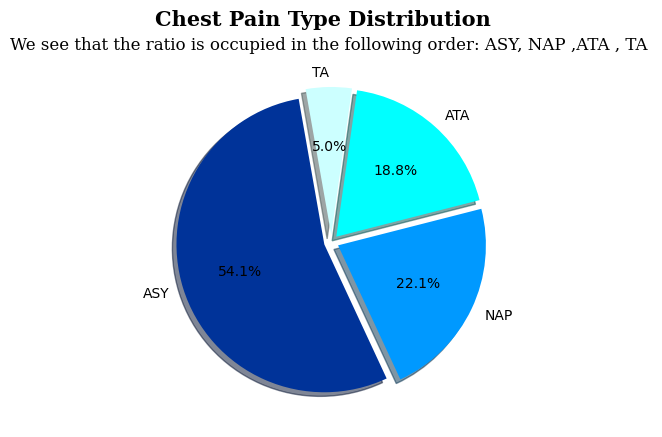

In [23]:
# 심부전 파이차트 
ratio = heart['ChestPainType'].value_counts()
ratio

# 파이 타츠 시각화 
plt.pie(x=ratio, labels=ratio.index, autopct='%0.1f%%', startangle=100, explode=[0.05, 0.05, 0.05, 0.05,], shadow=True, colors=['#003399', '#0099ff', '#00ffff', '#ccffff'])

plt.suptitle('Chest Pain Type Distribution', fontfamily='serif', fontsize=15, fontweight='bold')
plt.title('We see that the ratio is occupied in the following order: ASY, NAP ,ATA , TA ', fontfamily='serif', fontsize=12)
# 무증상(ASY)가 가장 많은 비율을 차기하고 다음으로 NAP(비협심증 흉통), ATA(비전형적인 협심증), TA(전형적인 협심증) 순으로 분포
# NAP와 ATA의 비율이 높은 것은 다양한 흉통 유형이 심장병의 가능성을 나타낼 수 있음
# TA의 낮은 비율은 심장병 환자들 사이에서 전형적인 협심증 보다는 다른 현태의 흉통이 더 흔할 수 있음을 시사


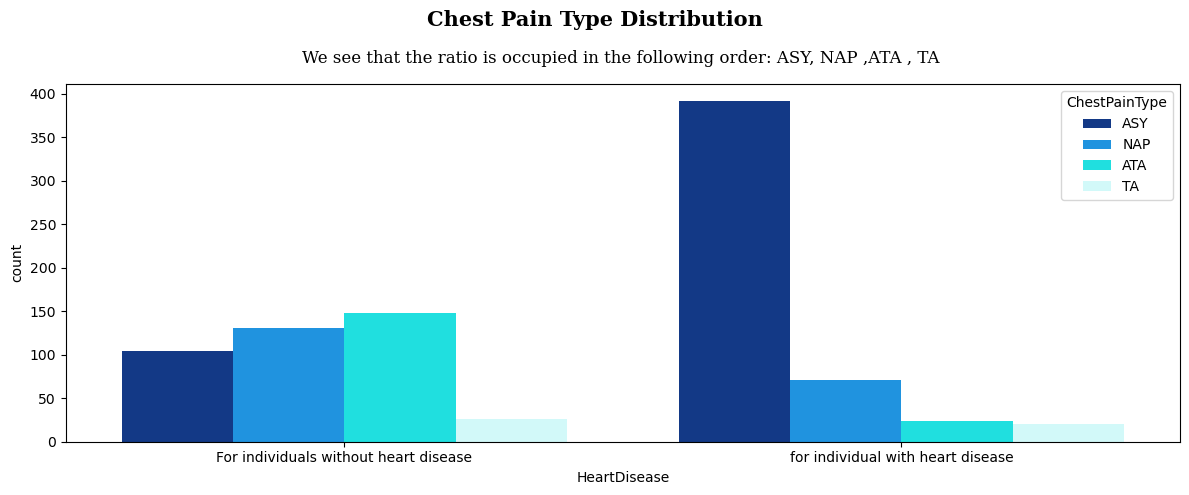

In [24]:
# 심부전증이 있을 때와 없을 떄 ASY(무증상)가 압드적으로 확인 
# 심장병 여부에 따른 흉통 유형 빈도 그래프 

plt.figure(figsize=(12,5))
sns.countplot(data=heart, x='HeartDisease', hue='ChestPainType', hue_order=['ASY', 'NAP' ,'ATA' , 'TA'], palette=['#003399', '#0099ff', '#00ffff', '#ccffff'])

plt.suptitle('Chest Pain Type Distribution', fontfamily='serif', fontsize=15, fontweight='bold')
plt.title('We see that the ratio is occupied in the following order: ASY, NAP ,ATA , TA ', fontfamily='serif', fontsize=12, pad=15)
plt.xticks([0,1], ['For individuals without heart disease', 'for individual with heart disease'])
plt.tight_layout()
plt.show()

# 심장병 환자와 비환자 간에 흉통 유형의 분포가 다르게 나타난다. 특히 심장병 환자의 ASY(무증상) 비율이 높다
# 이는 심장병 환자들이 주로 무증상 흉통을 겪는다는 것을 의미한다.
# 심장병 환자와는 다르게 비환자의 경우 흉통 유형의 발생 순서가 ATA(비전형적인 협심증)와 NAP(비협심증 흉통), ASY(무증상), TA(전형적인 협심증) 순서로 나타난다.
# 이는 비전형적인 혐심증과 비협심증 흉통의 빈번한 발생은 비환자들에게도 심장 건강에 대해 주의해야 함을 의미한다.